# Task 1: Import Modules


In [43]:
#  import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import datetime as dt
# prophet model
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error

In [44]:
# create images directory if it doesn't exist
import os
if not os.path.exists('images'):
    os.makedirs('images')
    print("Created 'images' directory")
else:
    print("'images' directory already exists")

'images' directory already exists


# Task 2: Load the Dataset

In [45]:
# load and print the dataset
df = pd.read_csv('TWITTER.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
1,2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300


In [46]:
# perform a basic statistical analysis
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2.172000e+03
mean,35.759811,36.435994,35.069503,35.732063,35.732063,2.191115e+07
std,14.305437,14.562577,14.003070,14.269980,14.269980,1.907344e+07
min,13.950000,14.220000,13.730000,14.010000,14.010000,3.661100e+06
25%,24.822500,25.549999,24.129999,24.862501,24.862501,1.258305e+07
50%,34.900002,35.430000,34.295000,34.754999,34.754999,1.713035e+07
75%,44.209999,45.095000,43.230000,44.132500,44.132500,2.430645e+07
max,78.360001,80.750000,76.050003,77.629997,77.629997,2.684654e+08


In [47]:
# print a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2172 non-null   object 
 1   Open       2172 non-null   float64
 2   High       2172 non-null   float64
 3   Low        2172 non-null   float64
 4   Close      2172 non-null   float64
 5   Adj Close  2172 non-null   float64
 6   Volume     2172 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 118.9+ KB


In [48]:
# change the Date column type to datetime
df["Date"] = pd.to_datetime(df['Date'])

# Task 3: Plot the Dataset

In [49]:
# create the subplots
columns = df.columns[1:]
fig = make_subplots(rows=3, cols=2, subplot_titles=columns)
for row in range(1, 4):
    for col in range(1, 3):
        column = columns[row * col - 1]
        fig.add_trace(go.Scatter(x = df['Date'] ,y = df[column]),row=row, col=col)
fig.update_layout(height=1500, width=1000, title_text="Twitter Data", showlegend=False)
fig.show()

# Save the figure
fig.write_html("images/twitter_data_subplots.html")
fig.write_image("images/twitter_data_subplots.png", width=1000, height=1500)
print("Saved: images/twitter_data_subplots.html and images/twitter_data_subplots.png")

Saved: images/twitter_data_subplots.html and images/twitter_data_subplots.png


# Task 4: Comparison of Volumes for Each Year


In [50]:
# create the pie chart
df['Year'] = df['Date'].dt.year
df_pie = df.groupby('Year')['Volume'].sum()

layout = {
    'title': 'Pie Chart for Sum of Volume Data against Each Year'}

fig = go.Figure(data=[go.Pie(labels=df_pie.index, values=df_pie.values, textinfo='label')], layout=layout)
fig.show()

# Save the figure
fig.write_html("images/volume_pie_chart.html")
fig.write_image("images/volume_pie_chart.png")
print("Saved: images/volume_pie_chart.html and images/volume_pie_chart.png")

Saved: images/volume_pie_chart.html and images/volume_pie_chart.png


# Task 5: Create an OHLC Chart

In [51]:
# create the OHLC chart
data = go.Ohlc(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Twitter Stocks',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2015-10-05', 'x1': '2015-10-05',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
        },
        {
        'x0': '2020-03-15', 'x1': '2020-03-15',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }
    ],
    'annotations': [{
        'x': '2015-10-05', 'y': 0.6, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Jack Dorsey becomes CEO of Twitter.'
        },
        {
        'x': '2020-03-15', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Lockdown started in USA due to Covid19.'
    }
    ]
}

fig = go.Figure(data=[data], layout=layout)
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

# Save the figure
fig.write_html("images/twitter_ohlc_chart.html")
fig.write_image("images/twitter_ohlc_chart.png")
print("Saved: images/twitter_ohlc_chart.html and images/twitter_ohlc_chart.png")

Saved: images/twitter_ohlc_chart.html and images/twitter_ohlc_chart.png


# Task 6: Take a Closer Look at OHLC Chart


In [52]:
# create the candlestick chart
after_covid = df.loc[df['Date'] > '2020-03-15']
max_value = after_covid.iloc[:,1:-2].max().max()

g = after_covid.groupby(["Date"])
monthly_averages = g.aggregate({"Open": np.mean, "High": np.mean, "Low": np.mean, "Close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

trace = go.Candlestick(x=monthly_averages['Date'],
                       open=monthly_averages['Open'].values.tolist(),
                       high=monthly_averages['High'].values.tolist(),
                       low=monthly_averages['Low'].values.tolist(),
                       close=monthly_averages['Close'].values.tolist(),
                      increasing=dict(line=dict(color= 'red')),
                decreasing=dict(line=dict(color= 'lightgreen')))

layout = {
    'title': 'Twitter Stocks <br> <i> After Covid </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': 0, 'x1': 1,
        'y0': max_value, 'y1': max_value, 'xref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
        }],
    'annotations': [{
        'x': '2020-03-15', 'y': 0.95, 'xref': 'x', 'yref': 'paper',
        'showarrow': False,
        'text': 'Peak Value = %f' %max_value
    }]
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

# Save the figure
fig.write_html("images/twitter_candlestick_after_covid.html")
fig.write_image("images/twitter_candlestick_after_covid.png")
print("Saved: images/twitter_candlestick_after_covid.html and images/twitter_candlestick_after_covid.png")

C:\Users\PAVAN\AppData\Local\Temp\ipykernel_24132\2494920708.py:6: FutureWarning:

The provided callable <function mean at 0x0000024AAAA66CA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



Saved: images/twitter_candlestick_after_covid.html and images/twitter_candlestick_after_covid.png


# Task 7: Visualizing Moving Average


In [53]:
# plot the moving average along with the close price
# Moving Averages (10, 50 and 200)
df['10D_avg'] = df.Close.rolling(window=10).mean()
df['50D_avg'] = df.Close.rolling(window=50).mean()
df['200D_avg'] = df.Close.rolling(window=200).mean()

# Plot
fig = make_subplots()

colors = ['#ffF500', '#E6a1cf', '#6E6E6E']
avgs = ['10D_avg', '50D_avg', '200D_avg']

fig.append_trace({'x': df["Date"], 'y': df['Close'], 'type': 'scatter', 'name': 'Close', 'line': {'color': 'green'}}, 1, 1)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': df["Date"], 'y': df[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)

fig['layout'].update(height=800, title='Relationship between MAs and Closing Price')
    
fig.show()

# Save the figure
fig.write_html("images/moving_averages_chart.html")
fig.write_image("images/moving_averages_chart.png", height=800)
print("Saved: images/moving_averages_chart.html and images/moving_averages_chart.png")

Saved: images/moving_averages_chart.html and images/moving_averages_chart.png


# Task 8: Predict Future Stocks


In [54]:
# create a new dataframe for training
df2 = df[["Date", "Close"]]
df2.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
df2.head()

C:\Users\PAVAN\AppData\Local\Temp\ipykernel_24132\1945547813.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2013-11-07,44.900002
1,2013-11-08,41.650002
2,2013-11-11,42.900002
3,2013-11-12,41.900002
4,2013-11-13,42.599998


In [55]:
# train the dataset
m = Prophet()

m.fit(df2)  

DEBUG	cmdstanpy:command.py:do_command()- cmd: where.exe tbb.dll
cwd: None
DEBUG	cmdstanpy:model.py:__init__()- TBB already found in load path
INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG	cmdstanpy:model.py:__init__()- TBB already found in load path
INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\PAVAN\AppData\Local\Temp\tmpttlxfkko\dp9uw8g9.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\PAVAN\AppData\Local\Temp\tmpttlxfkko\dp9uw8g9.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\PAVAN\AppData\Local\Temp\tmpttlxfkko\ajtpgrea.json
DEBUG	cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	

In [56]:
# make the predictions
# Create Future dates
future_prices = m.make_future_dataframe(periods=365, freq='D')

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2532,2023-06-20,49.114883,37.721578,60.380144
2533,2023-06-21,49.169751,37.859553,60.798845
2534,2023-06-22,49.360690,37.500261,60.271425
2535,2023-06-23,49.482674,38.224384,61.155573
2536,2023-06-24,44.344646,32.286452,56.226981


# Task 9: Plot the Predicted Values


Saved: images/prophet_daily_prediction.png


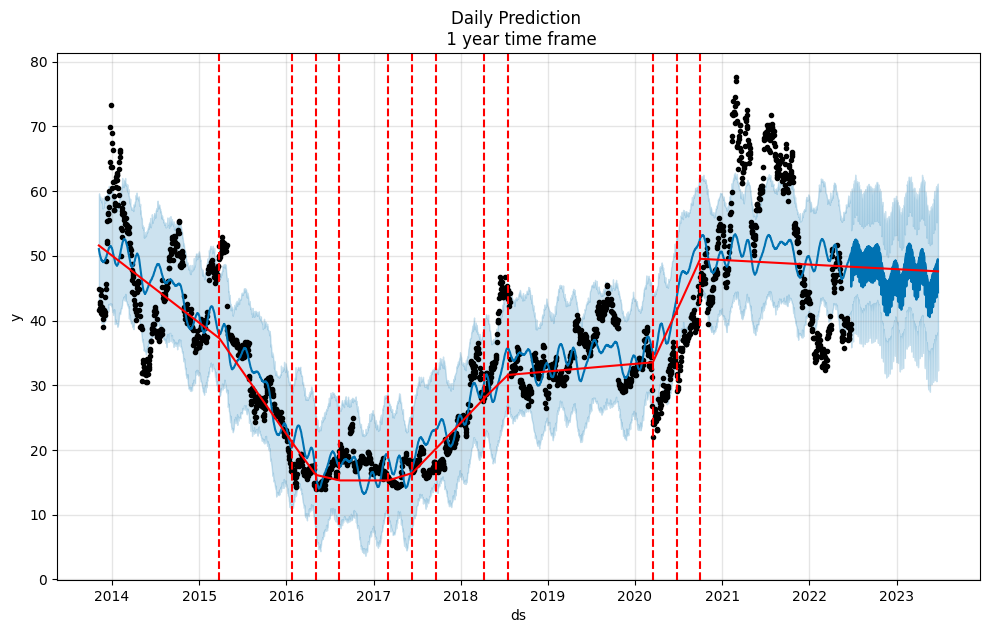

In [57]:
# plot the predicted data lines
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title("Daily Prediction \n 1 year time frame")

# Save the figure BEFORE showing it
plt.savefig("images/prophet_daily_prediction.png", dpi=300, bbox_inches='tight')
print("Saved: images/prophet_daily_prediction.png")

plt.show()

Saved: images/prophet_daily_components.png


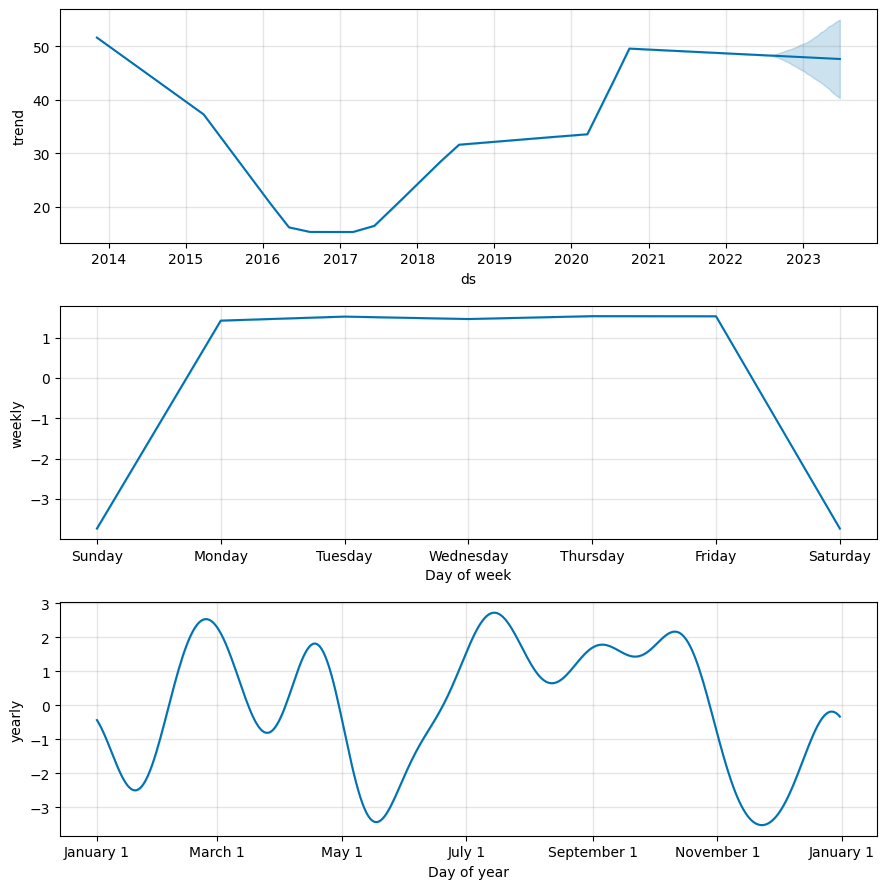

In [58]:
# create the subplots
fig = m.plot_components(forecast)
ax = fig.gca()

# Save the figure BEFORE showing it
plt.savefig("images/prophet_daily_components.png", dpi=300, bbox_inches='tight')
print("Saved: images/prophet_daily_components.png")

plt.show()

# Task 10: Forecast Monthly Stock Data


In [59]:
# forecast the monthly predictions
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.03).fit(df2)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)

DEBUG	cmdstanpy:command.py:do_command()- cmd: where.exe tbb.dll
cwd: None
DEBUG	cmdstanpy:model.py:__init__()- TBB already found in load path
DEBUG	cmdstanpy:model.py:__init__()- TBB already found in load path
INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\PAVAN\AppData\Local\Temp\tmpttlxfkko\go8r9rr4.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\PAVAN\AppData\Local\Temp\tmpttlxfkko\go8r9rr4.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\PAVAN\AppData\Local\Temp\tmpttlxfkko\d2wjyaxa.json
DEBUG	cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	

Saved: images/prophet_monthly_prediction.png


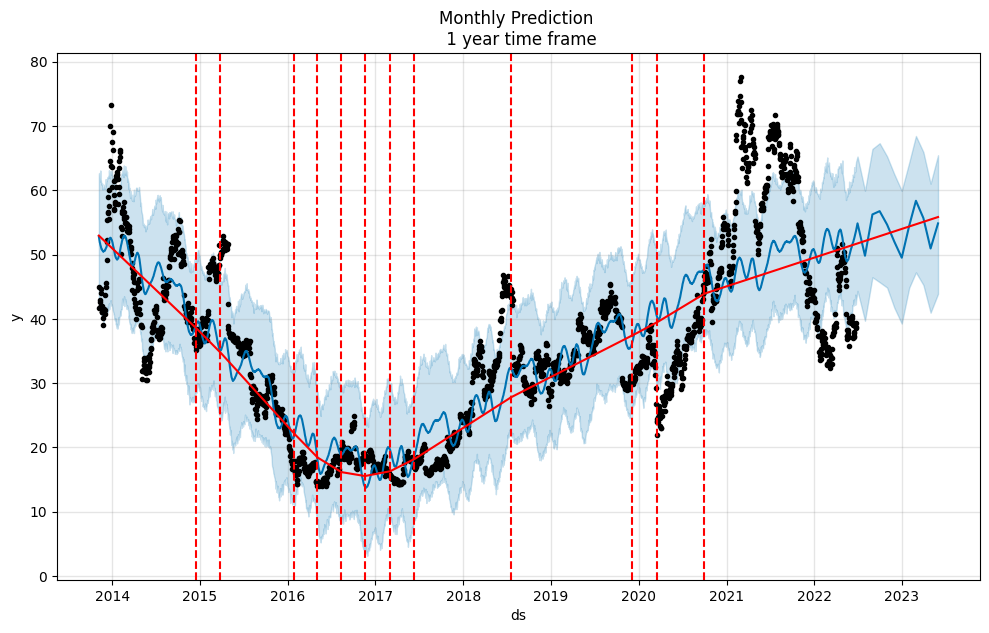

In [60]:
# plot the predicted data lines
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)
plt.title("Monthly Prediction \n 1 year time frame")

# Save the figure BEFORE showing it
plt.savefig("images/prophet_monthly_prediction.png", dpi=300, bbox_inches='tight')
print("Saved: images/prophet_monthly_prediction.png")

plt.show()

Saved: images/prophet_monthly_components.png


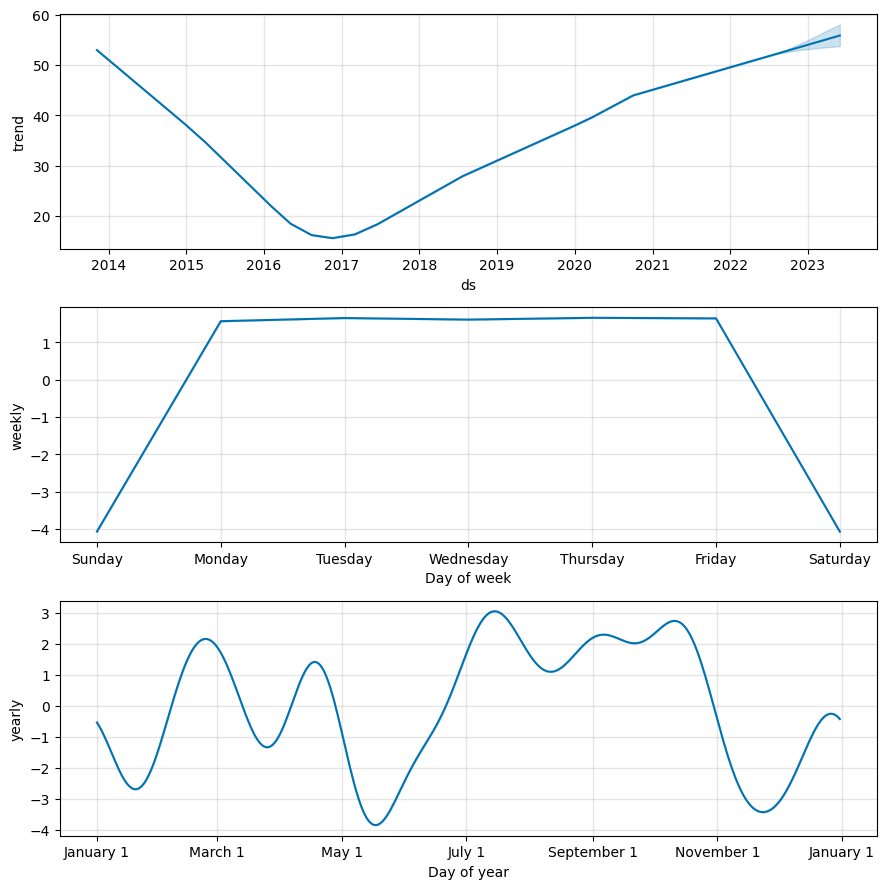

In [61]:
# create the subplots
fig = m.plot_components(fcst)
ax = fig.gca()

# Save the figure BEFORE showing it
plt.savefig("images/prophet_monthly_components.png", dpi=300, bbox_inches='tight')
print("Saved: images/prophet_monthly_components.png")

plt.show()

# Task 11: Evaluate the Model

In [62]:
# evaluate the model and print the mean absolute error
y_true = df2['y'].values
y_pred = fcst['yhat'][:-12].values
mae = mean_absolute_error(y_true, y_pred)
mae

6.140049365595515

In [63]:
# create the graph for comparison
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['ds'], y=y_true,
                    mode='lines',
                    name='Actual'))
fig.add_trace(go.Scatter(x=df2['ds'], y=y_pred,
                    mode='lines',
                    name='Predicted'))
fig['layout'].update(title='Line chart for Actual and Predicted values')
fig.show()

# Save the figure
fig.write_html("images/actual_vs_predicted_comparison.html")
fig.write_image("images/actual_vs_predicted_comparison.png")
print("Saved: images/actual_vs_predicted_comparison.html and images/actual_vs_predicted_comparison.png")

Saved: images/actual_vs_predicted_comparison.html and images/actual_vs_predicted_comparison.png
